# Quick look into Strava Data
#### Utilizing `stravalib` as a client

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

from stravalib import Client, unithelper

### The private information is removed for obvious reasons, but you can follow the instructions to generate the code and access_key.

In [12]:
client = Client()
# Register for an app here https://www.strava.com/settings/api
# You'll get your client_id there and then you can update 'your_client_id' here
authorize_url = client.authorization_url(client_id='your_client_id', redirect_uri='http://localhost:8282/authorized')
authorize_url

# If you navigate to the authorize_url, it will try and redirect to the redirect_uri; the code will be a url parameter. 

u'https://www.strava.com/oauth/authorize?approval_prompt=auto&redirect_uri=http%3A%2F%2Flocalhost%3A8282%2Fauthorized&response_type=code&client_id=12480'

In [14]:
# Your client_secret is also in the https://www.strava.com/settings/api page
access_token = client.exchange_code_for_token(client_id='your_client_id', client_secret='your_client_secret', code='your_code')

In [17]:
client.access_token = access_token

### We're going to only look at my activities that are of type 'Run'
#### The data I want to visualize is the total distance I run for each activity

##### `stravalib` has a `unithelper` to do some metric conversion

In [90]:
activities = [(activity.start_date, unithelper.kilometers(activity.distance)) 
              for activity in client.get_activities() if activity.type=='Run']

In [91]:
activities

[(datetime.datetime(2016, 7, 11, 14, 4, 6, tzinfo=<UTC>),
  Quantity(5.645899999999999, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime.datetime(2016, 6, 25, 13, 44, 6, tzinfo=<UTC>),
  Quantity(17.7926, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime.datetime(2016, 6, 22, 14, 7, 57, tzinfo=<UTC>),
  Quantity(10.583200000000001, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime.datetime(2016, 6, 20, 12, 38, 11, tzinfo=<UTC>),
  Quantity(8.329799999999999, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime.datetime(2016, 6, 18, 12, 4, 6, tzinfo=<UTC>),
  Quantity(21.4738, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime.datetime(2016, 6, 16, 14, 34, 23, tzinfo=<UTC>),
  Quantity(6.3905, NamedComposedUnit('km', ComposedUnit([LeafUnit('m', True)], [], 1000), False))),
 (datetime

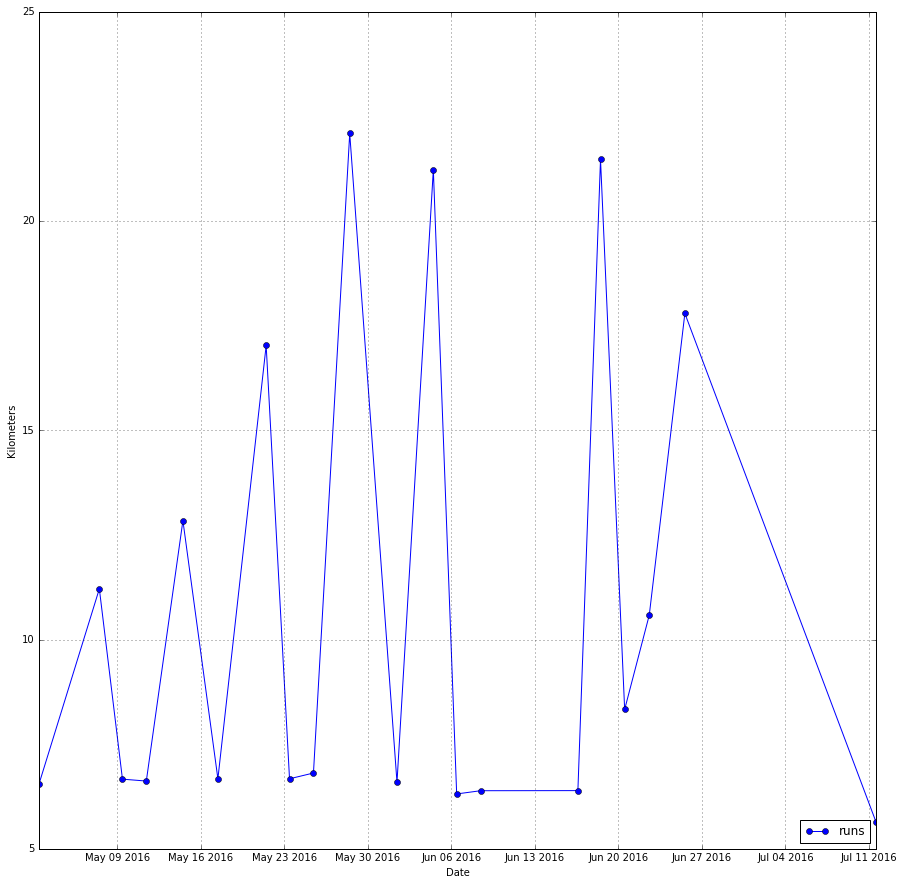

In [93]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)
plt.plot([x[0] for x in activities], [x[1] for x in activities], 'o-', label='runs')
plt.legend(loc=4)
plt.ylabel('Kilometers')
plt.xlabel('Date')
plt.grid()
plt.show()

### Another thing I'm trying to visualize is my speed progression for my shorter runs (less than 8km)

#### I know that I have shorter runs on weekdays, so i filter based off of that and the total distance

In [116]:
weekday_activities = [a for a in client.get_activities() 
                      if a.start_date.today().weekday() < 5 and 
                      a.type=='Run' and 
                      unithelper.kilometers(a.distance).num < 8]

In [102]:
weekday_activities

[<Activity id=637450085 name=u'Easy Run after an injury hiatus' resource_state=2>,
 <Activity id=611081984 name=u'Morning Run' resource_state=2>,
 <Activity id=602555813 name=u'Morning Run' resource_state=2>,
 <Activity id=600329979 name=u'Morning Run' resource_state=2>,
 <Activity id=594915696 name=u'Morning Run' resource_state=2>,
 <Activity id=587414156 name=u'Morning Run' resource_state=2>,
 <Activity id=585283560 name=u'Morning Run' resource_state=2>,
 <Activity id=578841889 name=u'Morning Run' resource_state=2>,
 <Activity id=572442770 name=u'Morning Run' resource_state=2>,
 <Activity id=570415486 name=u'Morning Run' resource_state=2>,
 <Activity id=562936311 name=u'Morning Run' resource_state=2>]

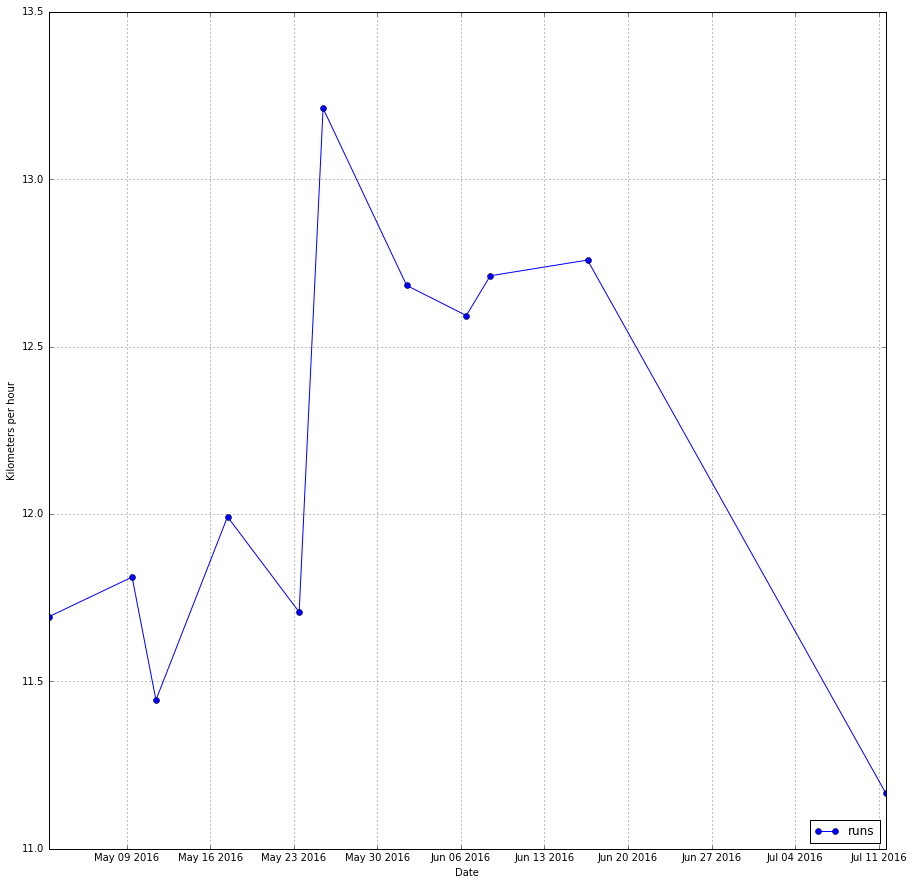

In [117]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)
plt.plot([x.start_date for x in weekday_activities],
         [unithelper.kph(x.average_speed) for x in weekday_activities], 'o-', label='runs')
plt.legend(loc=4)
plt.ylabel('Kilometers per hour')
plt.xlabel('Date')
plt.grid()
plt.show()